# 1.导入库以及定义全局变量

In [1]:
import numpy as np
from numpy import dot

from sklearn import datasets as ds  
from sklearn import model_selection as ms

import matplotlib.pyplot as plt 

import math as m 

# 2.读入并处理数据

In [2]:
#读取数据
def dataLoader(file):   
    global amountOfData
    global n_features
   
    #获取数据
    x_temp,y_temp = ds.load_svmlight_file(file) 
    
    #获取数据量&特征个数
    amountOfData = x_temp.shape[0]
    
    n_features = x_temp.shape[1] + 1
    
    #由于x_train是稀疏矩阵，而y_train是n维矩阵，作为初学者将其统一为ndarray处理
    x_temp = np.array( x_temp.todense() ) 
    
    #生成返回的x数据集
    #拼接数组，在最后加上个1
    app = np.array([1])
    return_x = np.zeros((x_temp.shape[0],n_features))
    for i in range(amountOfData):
        return_x[i] = np.append(x_temp[i],app)
   
    #生成返回的y数据集   
    return_y = y_temp.reshape(amountOfData,1)
    
    return return_x,return_y

 # 3.定义数据分割函数

In [3]:
def dataSpliter(x_source,y_source):
    global amountOfTrain
    x_train_return,x_validation_return,y_train_return,y_validation_return = ms.train_test_split( x_source,y_source,test_size=rateOfValidation )
    
    return x_train_return,x_validation_return,y_train_return,y_validation_return

# 4.定义loss函数

In [22]:
def loss(x_set,y_set,W):
    lossVector = y_set - np.dot(x_set,W)
    lossVector = 0.5 * dot( np.transpose(lossVector), lossVector )
    loss = lossVector[0][0]
    
    return loss

# 5.定义求梯度函数（导数）

In [5]:
def getGrad(x_set,y_set,W):
    grad = np.dot( np.transpose(x_set), ( np.dot(x_set,W) - y_set ) )
    return grad

# 6.定义优化函数

In [6]:
def optimizier(x_train,x_validation,y_train,y_validation):
    global it_num
    global lr
    global W
    global n_features
    global quotient
    global y_train_loss
    global y_validation_loss
    W = np.random.rand(n_features,1)
    
    j=0
    for i in range(it_num):
        if( (i+1) % quotient == 0 ):
            y_train_loss[j] = loss(x_train,y_train,W)
            y_validation_loss[j] = loss(x_validation,y_validation,W)
            j = j + 1
        W = W - lr * getGrad(x_train,y_train,W)

# Ex.直接求出闭解，得到最小loss

In [30]:
def minLoss(x_set,y_set):
    #得到W的最优闭解
    x_set = np.asmatrix(x_set)
    Wm = dot( np.asarray( (x_set.T * x_set).I * x_set.T ) , y_set )
    x_set = np.asarray(x_set)
    
    return loss( x_set, y_set, Wm )

# 7. 定义作图函数 

In [8]:
def draw():
    global x_it_num
    global y_train_loss
    global y_validation_loss
    
    plt.figure(figsize=(10,8), dpi=80)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    
    plt.title( 'Linear Regression', fontsize=30 )
    
    plt.xlabel( 'iterations numbers', fontsize=20 )
    plt.ylabel( 'loss', fontsize=20 )
    
    plt.plot( x_it_num, y_train_loss, label='train_loss' )
    plt.plot( x_it_num, y_validation_loss, label='validation_loss' )
    
    plt.legend()
    plt.show()

#  8.定义全局变量以及主要过程

预测结果(最好结果): 1530.2397694
评估结果: 1931.79878646


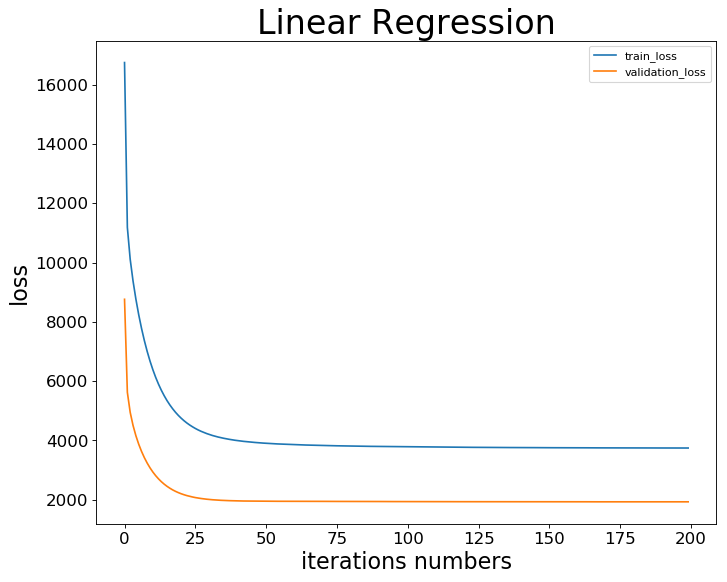

In [60]:
# 定义全局变量
#数据shape和amount相关全局变量
amountOfData = 0 

rateOfValidation = 1/3

n_features = 0

#迭代次数it_num,惩罚系数C，学习率lr，权值W，
it_num = 2000
lr = 0.0001
W = 0 #在优化函数中才能初始化 

#作图x,y相关列表（采用列表方式）
amountOfPoints = 200
quotient = it_num // amountOfPoints 
#主要是为了方便。。。请保证这个it_num能被amountOfPoints整除 
x_it_num = np.arange(amountOfPoints)
y_train_loss = np.arange(amountOfPoints)
y_validation_loss = np.arange(amountOfPoints)

#主函数部分
#读取数据&分割数据
x_source,y_source = dataLoader('D:/housing.txt')
x_train,x_validation,y_train,y_validation = dataSpliter(x_source,y_source)

#进行优化
optimizier(x_train,x_validation,y_train,y_validation)

#理想结果和评估结果
ml = minLoss(x_validation,y_validation)
l = loss(x_validation,y_validation,W)
print( '预测结果(最好结果):',ml )
print( '评估结果:',l )

#画图
draw()
